In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [4]:
df=pd.read_csv("../Assignment 13-KNN/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
pd.isnull(df).value_counts()

RI     Na     Mg     Al     Si     K      Ca     Ba     Fe     Type 
False  False  False  False  False  False  False  False  False  False    214
dtype: int64

In [7]:
# Split data into features (X) and target variable (y)
X = df.drop('Type', axis=1)
y = df['Type']

In [10]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Instantiate KNN classifier
model=KNeighborsClassifier(n_neighbors=12)
# Train the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [15]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  1  0  0  0  0]
 [ 5  9  0  0  0  0]
 [ 1  2  0  0  0  0]
 [ 0  3  0  1  0  0]
 [ 1  0  0  0  0  2]
 [ 0  0  0  0  0  8]]

Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.91      0.71        11
           2       0.60      0.64      0.62        14
           3       0.00      0.00      0.00         3
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         3
           7       0.80      1.00      0.89         8

    accuracy                           0.65        43
   macro avg       0.50      0.47      0.44        43
weighted avg       0.59      0.65      0.59        43



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
kfold=KFold(n_splits=10)
results=cross_val_score(model,X,y,cv=kfold)

In [19]:
results

array([0.5       , 0.81818182, 0.72727273, 0.90909091, 0.19047619,
       0.52380952, 0.42857143, 0.        , 0.14285714, 0.04761905])

In [20]:
print(results.mean())

0.42878787878787883


In [29]:
warnings.filterwarnings('ignore')
k_range=range(1,40)
k_scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())
#pd.Series(k_scores).sort_values(ascending=False)

In [30]:
k_range

range(1, 40)

In [31]:
k_scores

[0.6502164502164502,
 0.6225108225108225,
 0.6502164502164502,
 0.6454545454545455,
 0.6454545454545455,
 0.6411255411255412,
 0.6270562770562771,
 0.617965367965368,
 0.5948051948051949,
 0.6136363636363636,
 0.5898268398268398,
 0.6088744588744589,
 0.6090909090909091,
 0.6136363636363636,
 0.6041125541125542,
 0.6181818181818182,
 0.6183982683982685,
 0.6324675324675325,
 0.637012987012987,
 0.6324675324675325,
 0.6277056277056278,
 0.6419913419913421,
 0.6231601731601732,
 0.6324675324675325,
 0.6186147186147186,
 0.6324675324675325,
 0.6279220779220779,
 0.6324675324675325,
 0.6277056277056278,
 0.6277056277056278,
 0.6229437229437229,
 0.6136363636363636,
 0.6136363636363636,
 0.6088744588744589,
 0.6041125541125542,
 0.6041125541125542,
 0.6134199134199134,
 0.59004329004329,
 0.5993506493506493]

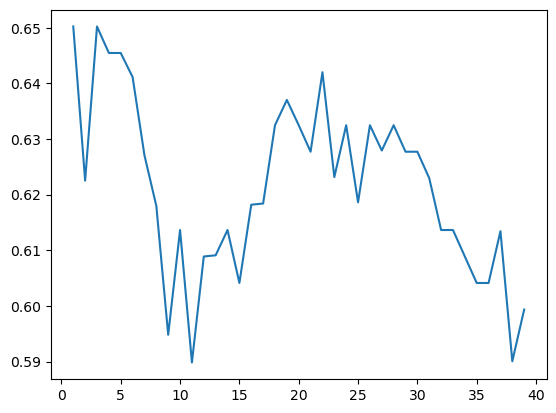

In [32]:
plt.plot(k_range,k_scores)

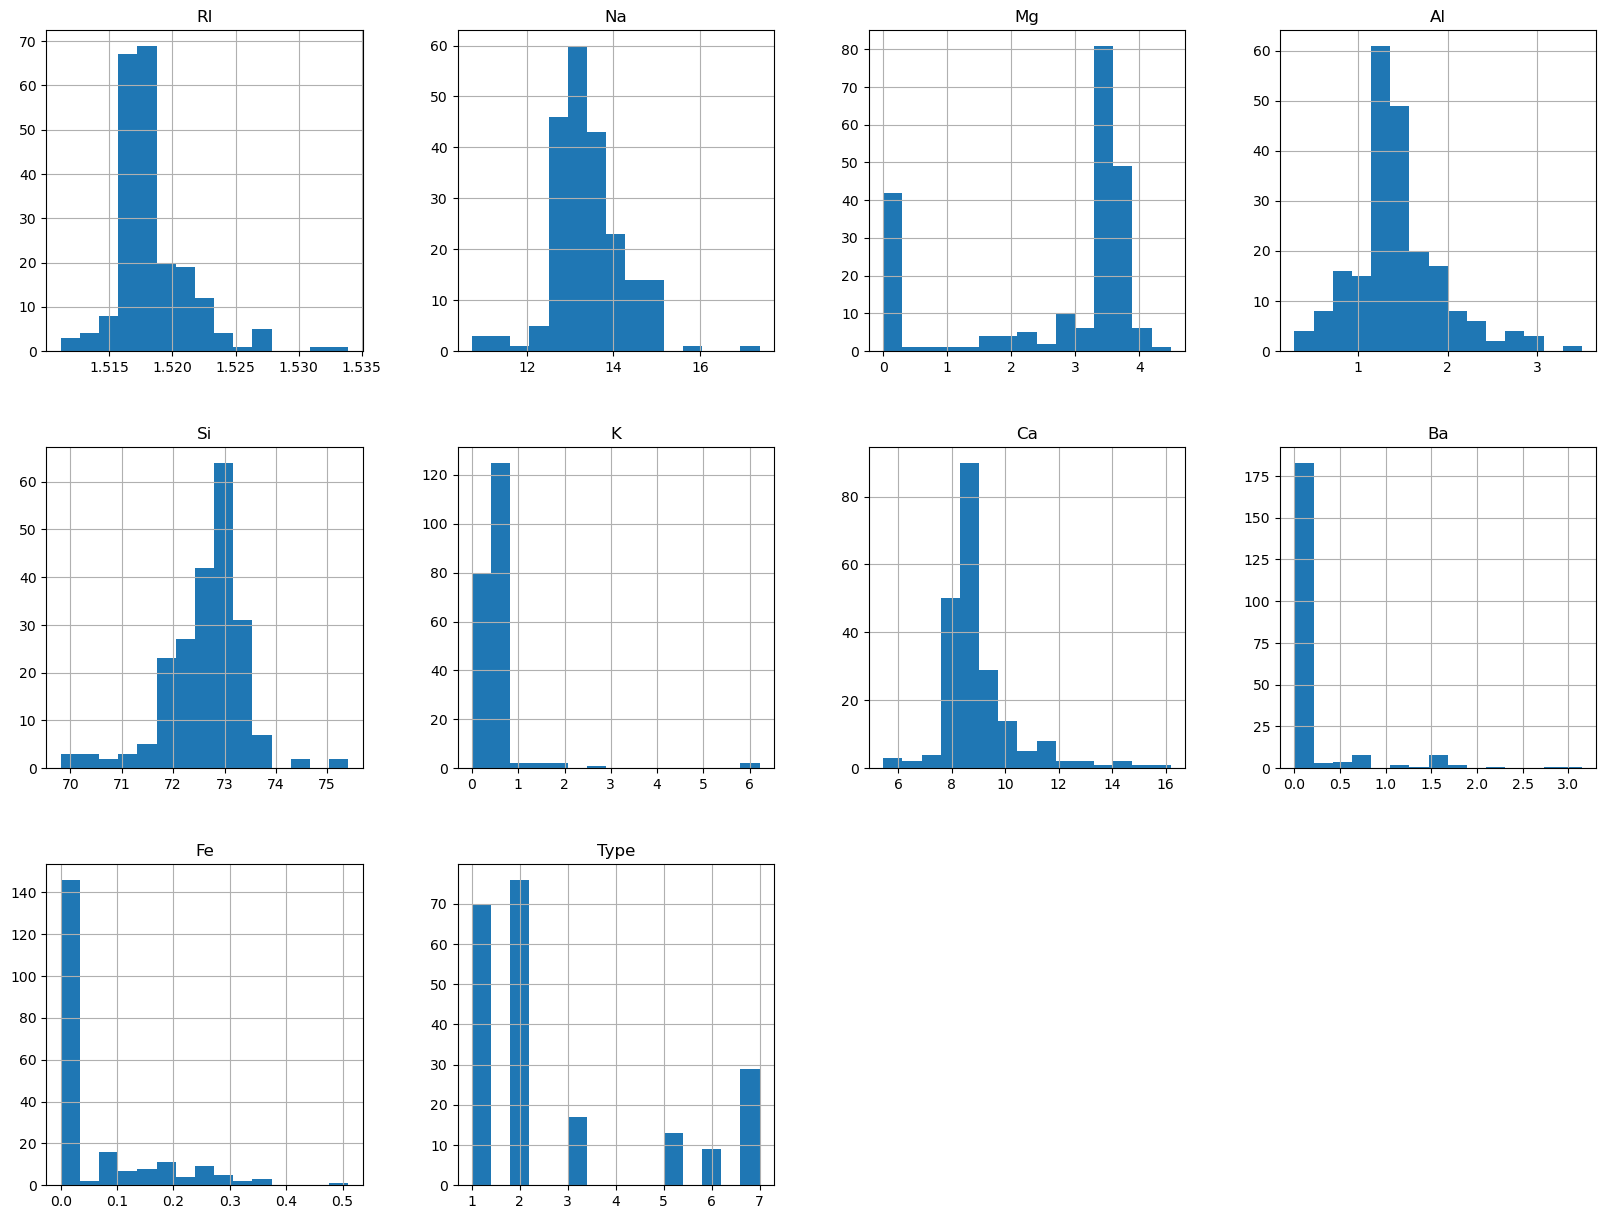

In [37]:
import matplotlib.pyplot as plt

# For histograms
df.hist(bins=15, figsize=(20, 15), layout=(3, 4))
plt.show()


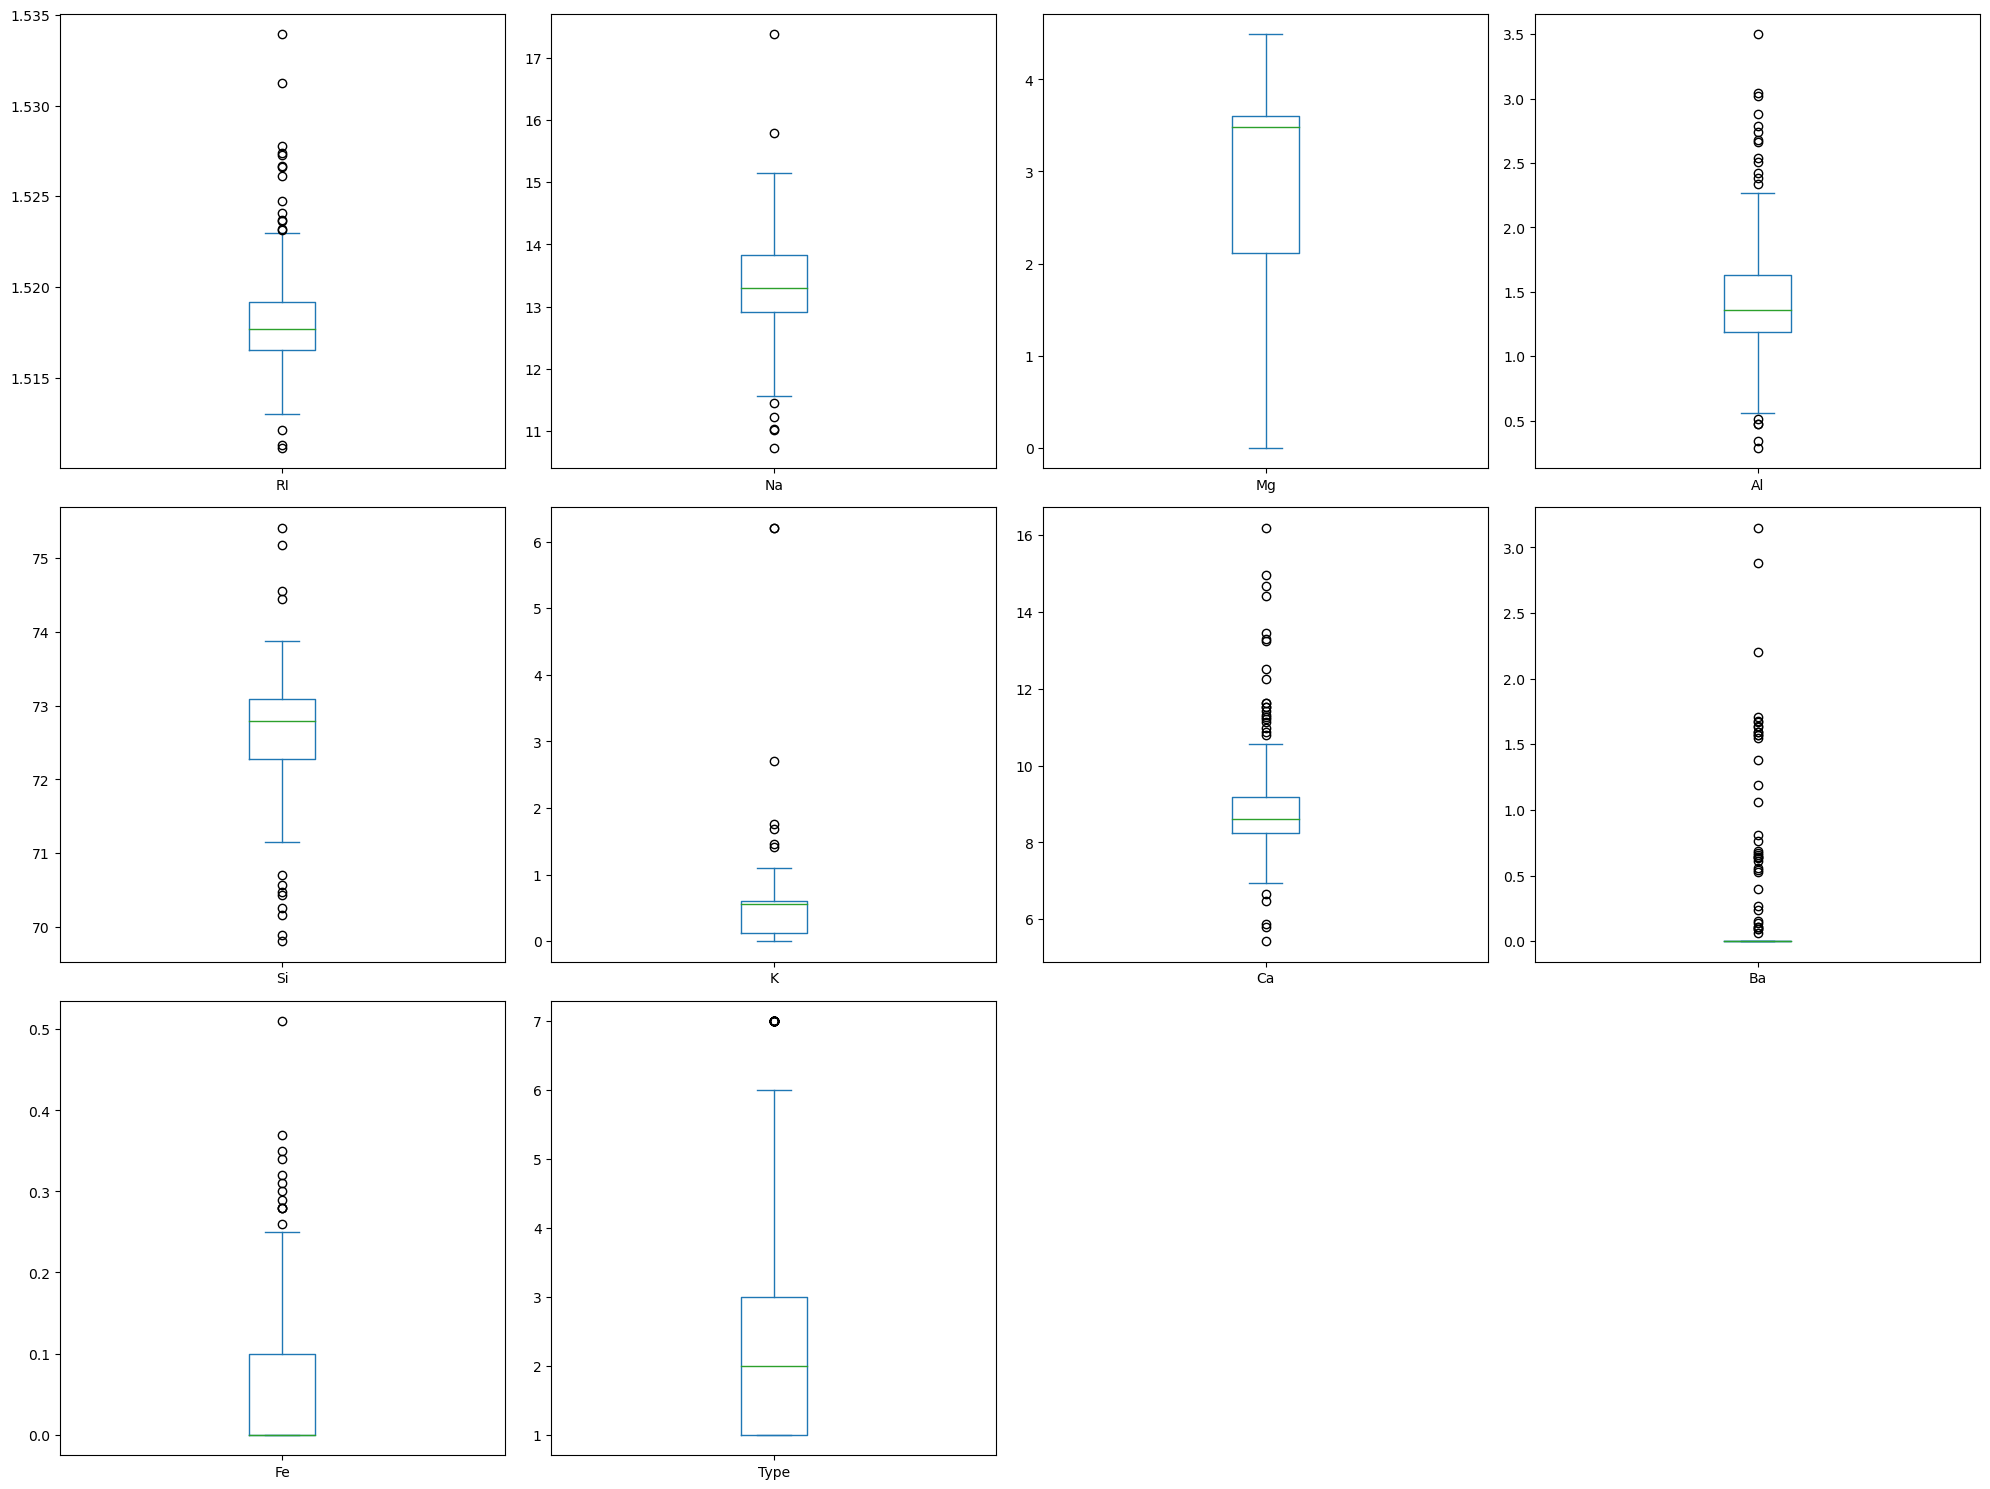

In [38]:
# For box plots
df.plot(kind='box', subplots=True, layout=(3, 4), figsize=(20, 15))
plt.tight_layout()  # This can help in adjusting the spacing between plots to prevent overlap
plt.show()


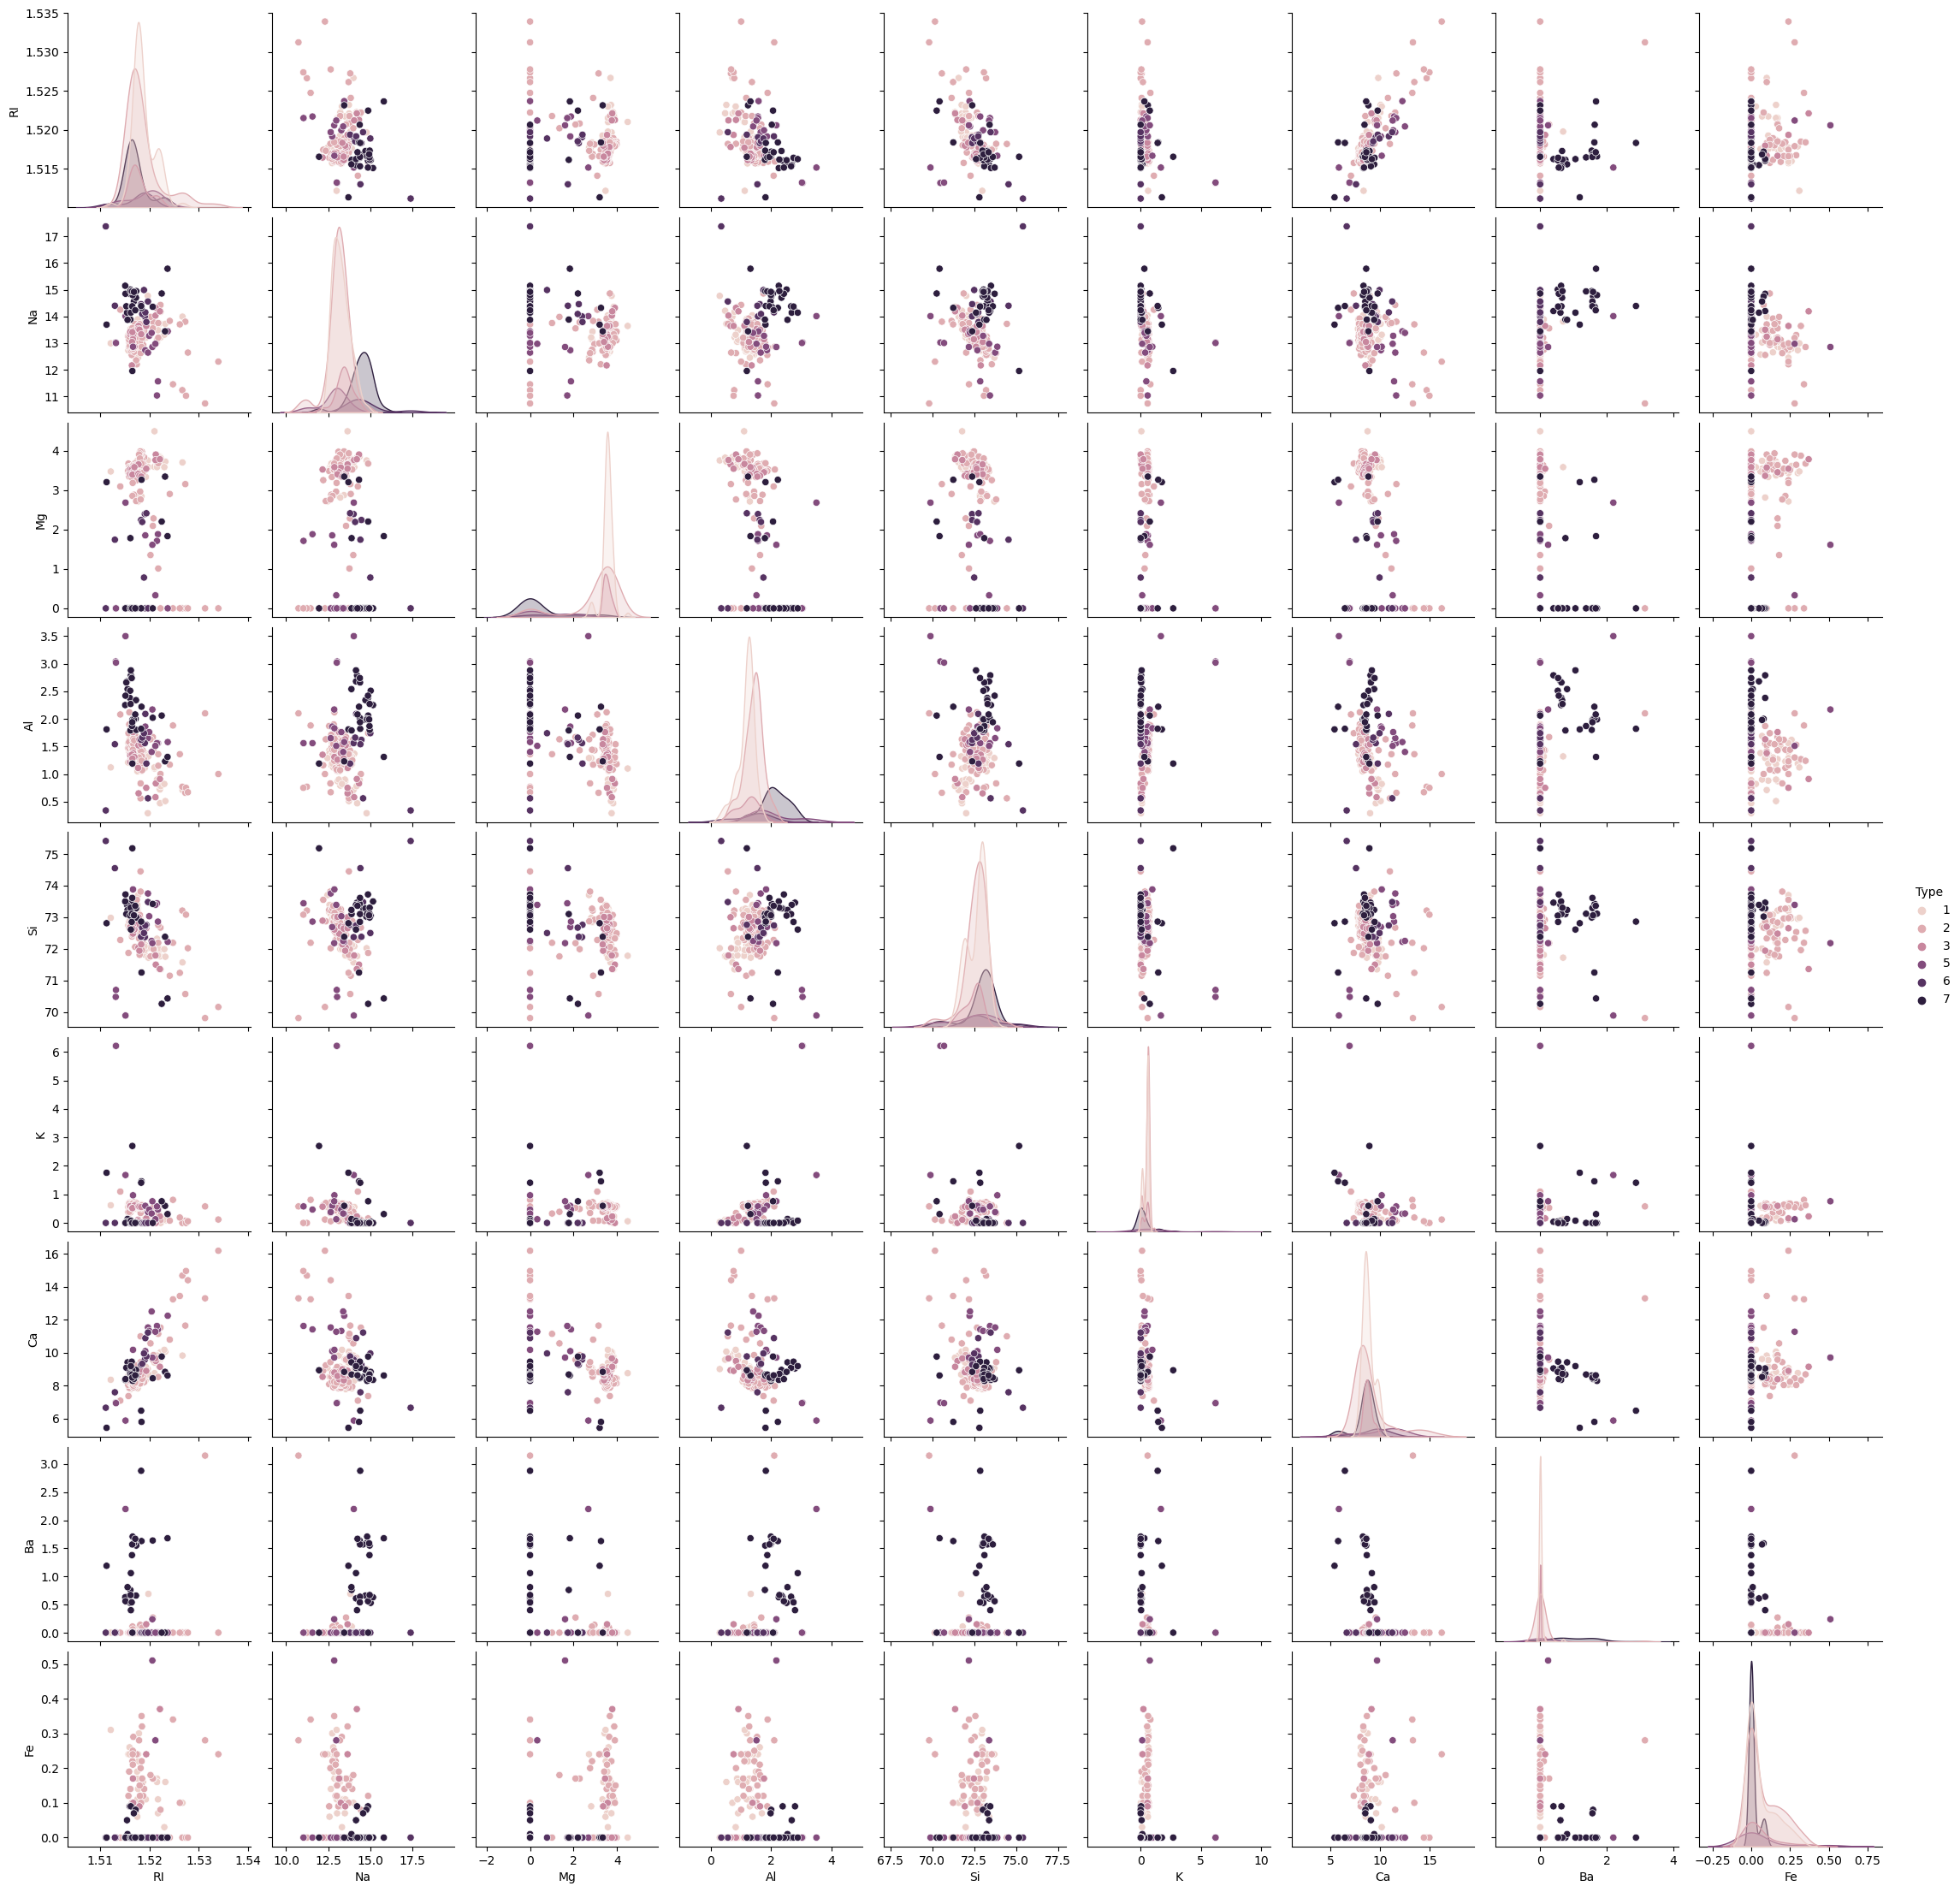

In [40]:
import seaborn as sns

sns.pairplot(df, hue="Type")
plt.show()

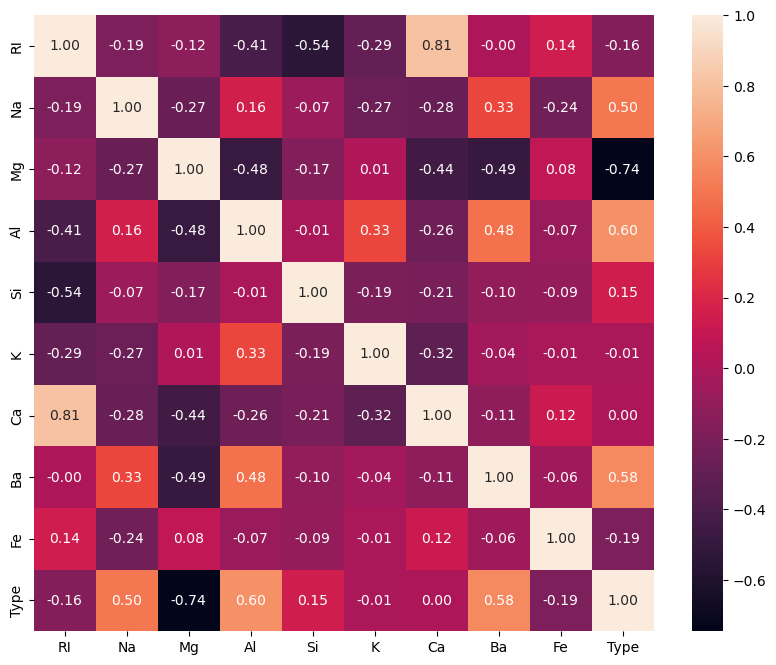

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

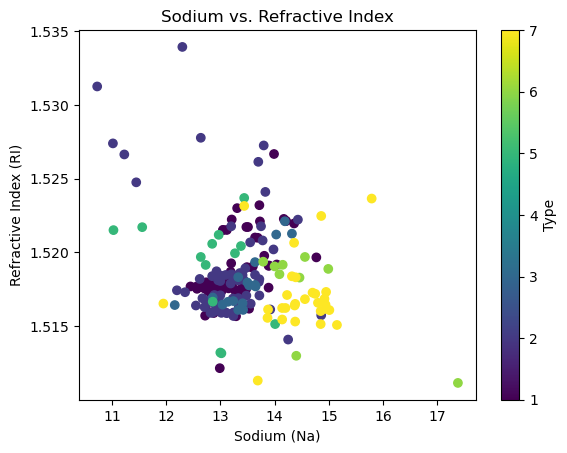

In [42]:
plt.scatter(df['Na'], df['RI'], c=df['Type'])
plt.xlabel('Sodium (Na)')
plt.ylabel('Refractive Index (RI)')
plt.title('Sodium vs. Refractive Index')
plt.colorbar(label='Type')
plt.show()

In [43]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

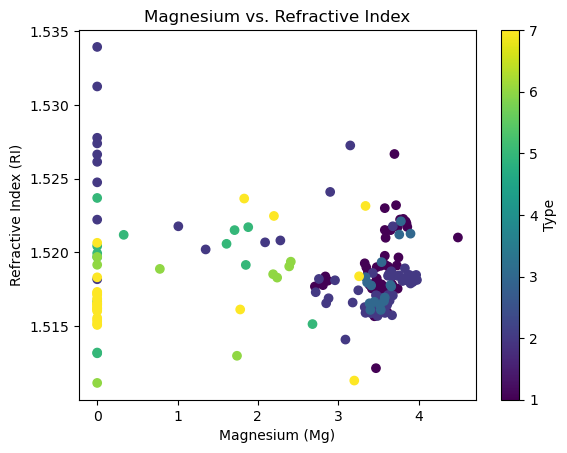

In [45]:
plt.scatter(df['Mg'], df['RI'], c=df['Type'])
plt.xlabel('Magnesium (Mg)')
plt.ylabel('Refractive Index (RI)')
plt.title('Magnesium vs. Refractive Index')
plt.colorbar(label='Type')
plt.show()

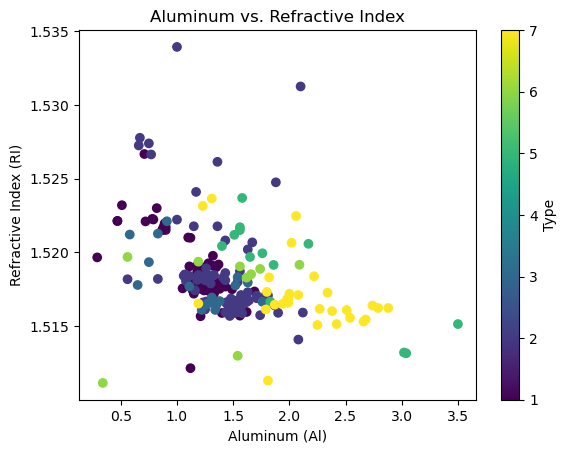

In [47]:
plt.scatter(df['Al'], df['RI'], c=df['Type'])
plt.xlabel('Aluminum (Al)')
plt.ylabel('Refractive Index (RI)')
plt.title('Aluminum vs. Refractive Index')
plt.colorbar(label='Type')
plt.show()

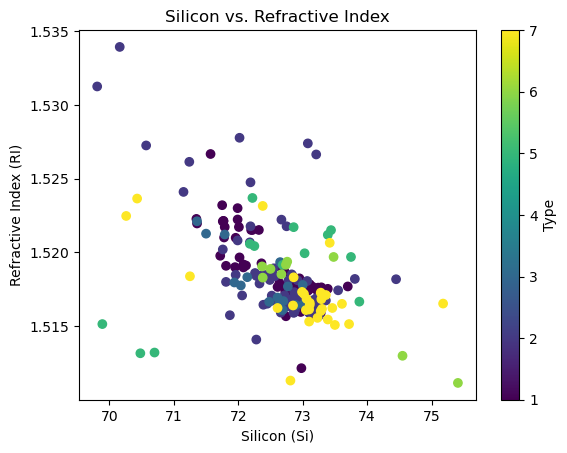

In [48]:
plt.scatter(df['Si'], df['RI'], c=df['Type'])
plt.xlabel('Silicon (Si)')
plt.ylabel('Refractive Index (RI)')
plt.title('Silicon vs. Refractive Index')
plt.colorbar(label='Type')
plt.show()

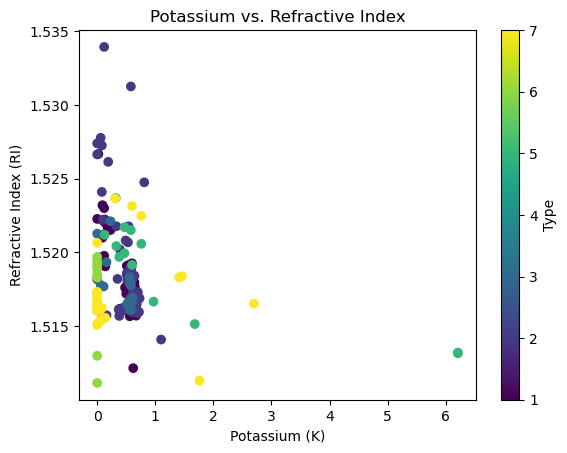

In [49]:
plt.scatter(df['K'], df['RI'], c=df['Type'])
plt.xlabel('Potassium (K)')
plt.ylabel('Refractive Index (RI)')
plt.title('Potassium vs. Refractive Index')
plt.colorbar(label='Type')
plt.show()

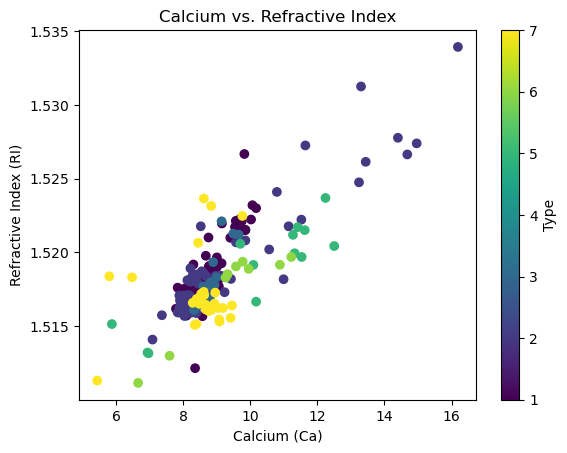

In [50]:
plt.scatter(df['Ca'], df['RI'], c=df['Type'])
plt.xlabel('Calcium (Ca)')
plt.ylabel('Refractive Index (RI)')
plt.title('Calcium vs. Refractive Index')
plt.colorbar(label='Type')
plt.show()

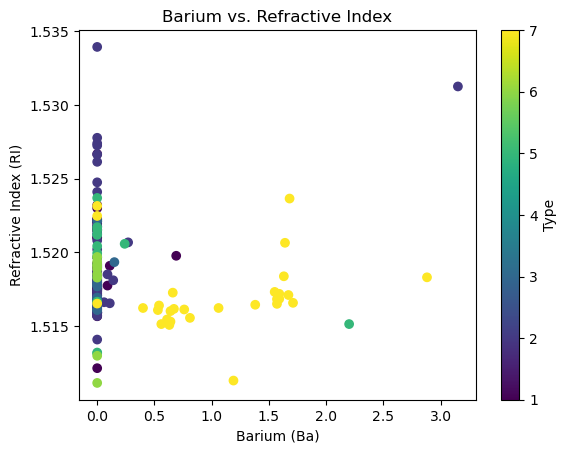

In [52]:
plt.scatter(df['Ba'], df['RI'], c=df['Type'])
plt.xlabel('Barium (Ba)')
plt.ylabel('Refractive Index (RI)')
plt.title('Barium vs. Refractive Index')
plt.colorbar(label='Type')
plt.show()

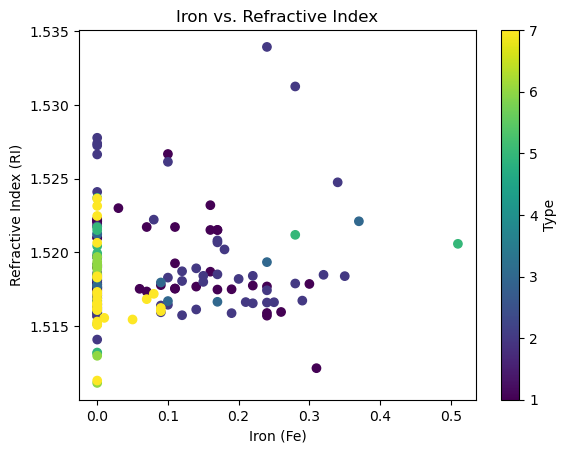

In [53]:
plt.scatter(df['Fe'], df['RI'], c=df['Type'])
plt.xlabel('Iron (Fe)')
plt.ylabel('Refractive Index (RI)')
plt.title('Iron vs. Refractive Index')
plt.colorbar(label='Type')
plt.show()

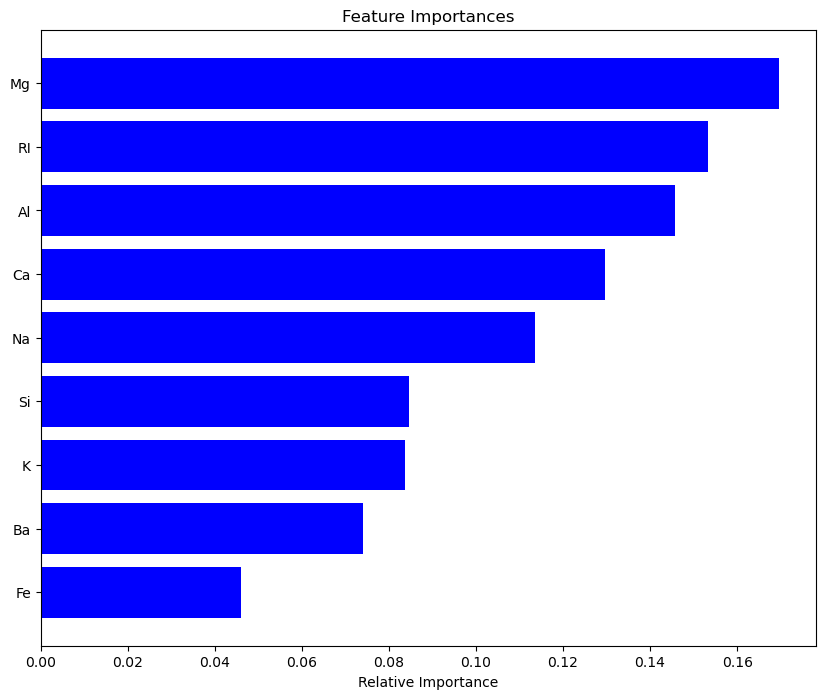

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Plotting feature importances
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])  # Matching tick positions and labels
plt.xlabel('Relative Importance')
plt.show()
